In [144]:
##In this notebook, we will use Keras and neural networks to model as simple 1d linear regression

In [145]:
%matplotlib inline

In [146]:
import pandas as pd
import numpy as np

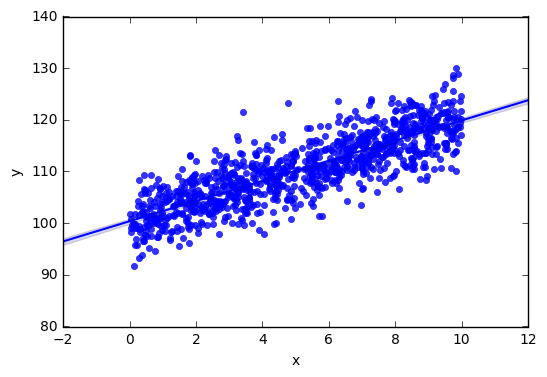

In [147]:
##Create a linear dataset with noise
mu, sigma, size = 0, 4, 1000
x = np.random.uniform(0,10, size)

delta = np.random.normal(mu, sigma, size=(size,))

m, b = 2, 100

df = pd.DataFrame({'x':x, 'delta':delta})
df['y_perfect'] = df['x'].apply(lambda x: m*x+b)
df['y'] = df['y_perfect']+df['delta']

import seaborn as sns

ax1 = sns.regplot(x='x', y='y', data=df)


In [148]:
from keras.layers import Dense, Input
from keras.layers.normalization import BatchNormalization
from keras.models import Model

In [ ]:
from keras.callbacks import Callback

class PrintWeights(Callback):
    """Print the weights after each epoch."""
    
    def on_epoch_end(self, batch, logs={}):
        current_m = model.layers[1].get_weights()[0][0][0]
        current_b = model.layers[1].get_weights()[1][0]
        print "\nm=%.2f b=%.2f\n" % (current_m, current_b)
print_weights = PrintWeights()

In [ ]:
inputs = Input((1,))
linear_layer = Dense(1, activation='linear')(inputs)

model = Model(inputs=inputs, outputs=linear_layer)
model.compile(loss='mse', optimizer='sgd')
model.optimizer.lr.set_value(.01)
print model.optimizer.lr.get_value()


model.fit(x=df['x'], y=df['y'], validation_split=0.2, batch_size=1, epochs=80, callbacks=[print_weights])

0.00999999977648
Train on 800 samples, validate on 200 samples
Epoch 1/80
752/800 [===========================>..] - ETA: 0s - loss: 459.1233
m=1.84 b=97.82

800/800 [==============================] - 0s - loss: 432.9842 - val_loss: 25.4672
Epoch 2/80
749/800 [===========================>..] - ETA: 0s - loss: 32.9032
m=2.28 b=100.97

800/800 [==============================] - 0s - loss: 32.4117 - val_loss: 17.8227
Epoch 3/80
751/800 [===========================>..] - ETA: 0s - loss: 26.1004
m=2.93 b=101.16

800/800 [==============================] - 0s - loss: 26.7080 - val_loss: 49.9681
Epoch 4/80
751/800 [===========================>..] - ETA: 0s - loss: 27.6699
m=1.76 b=100.59

800/800 [==============================] - 0s - loss: 27.2761 - val_loss: 15.2521
Epoch 5/80
747/800 [===========================>..] - ETA: 0s - loss: 28.7063
m=0.88 b=100.18

800/800 [==============================] - 0s - loss: 28.3699 - val_loss: 60.0855
Epoch 6/80
748/800 [===========================>..]

In [ ]:
model.get_weights()